# Cluster Analysis with KMeans
On this notebook we're going to apply KMeans clustering on the Iris dataset.


Source: archive.ics.uci.edu/ml/datasets/iris

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
raw_data = pd.read_csv('iris-dataset.csv')

raw_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Comparing the sepal_length & sepal_width and petal_length & petal_width features by using scatter plot.

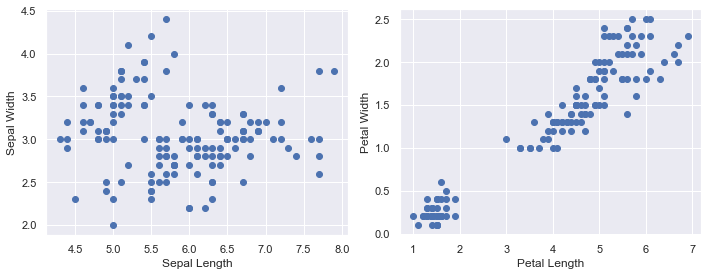

In [22]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

ax1.scatter(raw_data['sepal_length'], raw_data['sepal_width'])
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width')

ax2.scatter(raw_data['petal_length'], raw_data['petal_width'])
ax2.set_xlabel('Petal Length')
ax2.set_ylabel('Petal Width')

fig.tight_layout()
plt.show()

## Clustering the data

First we're going to standardize the variables before clustering.
Second we're going to use the Elbow Method to decide which number of cluster looks more appropriate.
(Originally the real number of cluster is 3 according to dataset but we're going to try with 2, 3 and 5 to analyze.)
Last we're going to cluster the data with KMeans method by choosing the cluster number.

### Standardizing the data

In [23]:
from sklearn import preprocessing

data_scaled = preprocessing.scale(raw_data)
data_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

### WCSS & Elbow Method

In [25]:
wcss = []
cluster_num = 10 # Choosing an arbitrary number as a max value
for i in range(1, cluster_num):
    kmeans = KMeans(i) # creating the kmeans object with 'i' clusters
    kmeans.fit(data_scaled)
    wcss_n = kmeans.inertia_
    wcss.append(wcss_n)
wcss

[600.0000000000003,
 223.73200573676343,
 140.96581663074699,
 114.6446141558917,
 91.06677122728537,
 80.24972235577128,
 72.43166254277776,
 63.691169088355295,
 55.90408516386274]

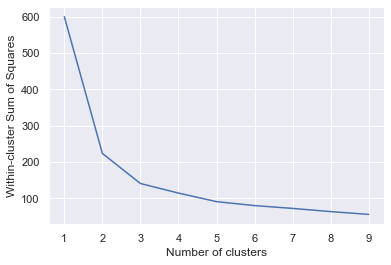

In [27]:
number_clusters = range(1,cluster_num)
plt.plot(number_clusters, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares');

We can see that appropriate number of cluster for this data can be 3. However, in real-life grouping as 3 might not solve our clustering problem. This just gives us an insight.

### Clustering and Plotting

#### Number of clusters = 2

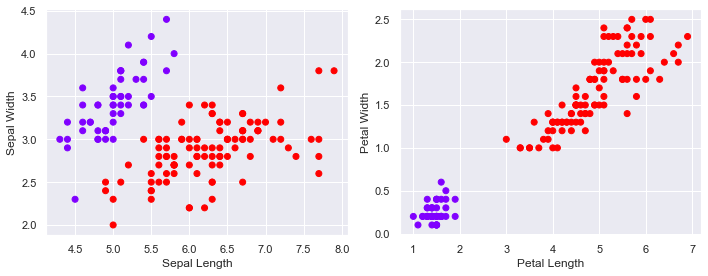

In [30]:
# Number of clusters = 2

kmeans = KMeans(2)
kmeans.fit(data_scaled)

data_clustered = raw_data.copy()
data_clustered['cluster_pred'] = kmeans.fit_predict(data_scaled) # predicting cluster for each observation

# Plotting for both Sepal and Petal
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

ax1.scatter(data_clustered['sepal_length'], data_clustered['sepal_width'], c=data_clustered['cluster_pred'], cmap='rainbow')
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width')

ax2.scatter(data_clustered['petal_length'], data_clustered['petal_width'], c=data_clustered['cluster_pred'], cmap='rainbow')
ax2.set_xlabel('Petal Length')
ax2.set_ylabel('Petal Width')

fig.tight_layout()
plt.show()

#### Number of clusters = 3

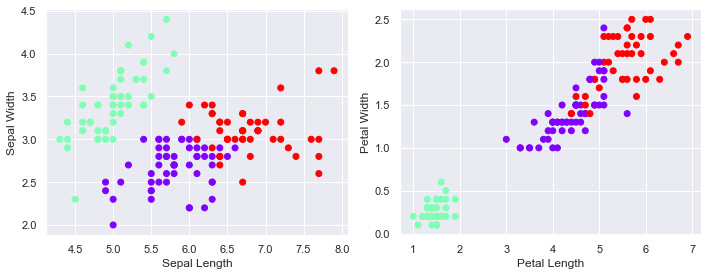

In [31]:
# Number of clusters = 3

kmeans = KMeans(3)
kmeans.fit(data_scaled)

data_clustered = raw_data.copy()
data_clustered['cluster_pred'] = kmeans.fit_predict(data_scaled) # predicting cluster for each observation

# Plotting for both Sepal and Petal
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

ax1.scatter(data_clustered['sepal_length'], data_clustered['sepal_width'], c=data_clustered['cluster_pred'], cmap='rainbow')
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width')

ax2.scatter(data_clustered['petal_length'], data_clustered['petal_width'], c=data_clustered['cluster_pred'], cmap='rainbow')
ax2.set_xlabel('Petal Length')
ax2.set_ylabel('Petal Width')

fig.tight_layout()
plt.show()

#### Number of clusters = 5

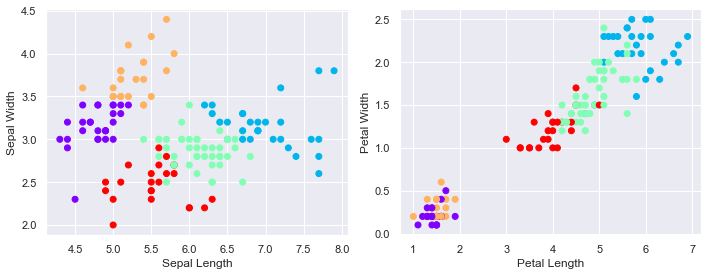

In [32]:
# Number of clusters = 5

kmeans = KMeans(5)
kmeans.fit(data_scaled)

data_clustered = raw_data.copy()
data_clustered['cluster_pred'] = kmeans.fit_predict(data_scaled) # predicting cluster for each observation

# Plotting for both Sepal and Petal
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

ax1.scatter(data_clustered['sepal_length'], data_clustered['sepal_width'], c=data_clustered['cluster_pred'], cmap='rainbow')
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width')

ax2.scatter(data_clustered['petal_length'], data_clustered['petal_width'], c=data_clustered['cluster_pred'], cmap='rainbow')
ax2.set_xlabel('Petal Length')
ax2.set_ylabel('Petal Width')

fig.tight_layout()
plt.show()

### Few notes to share

There are few important take-aways that I'd like to share.

By looking at the plots, we could conclude that 2 clusters (or maybe 4) might fit this dataset of observations really well. But the real number of clusters, as mentioned above, is in fact 3.

So the Elbow Method is imperfect; KMeans method is very useful when we already know the number of clusters (e.g 3). We should always try different methods of clustering to get a better understanding of our data, hence the better results.